Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - accuracy: 0.8730 - loss: 0.4450 - val_accuracy: 0.9832 - val_loss: 0.0562
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9809 - loss: 0.0605 - val_accuracy: 0.9865 - val_loss: 0.0457
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9874 - loss: 0.0399 - val_accuracy: 0.9862 - val_loss: 0.0500
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9911 - loss: 0.0292 - val_accuracy: 0.9880 - val_loss: 0.0487
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9872 - val_loss: 0.0538
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9793 - loss: 0.0632

✅ Test Accuracy: 0.9825 | Test Loss: 0.0524
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Digit 0 Accuracy: 0.9939
Digit 1 Accuracy: 0.9947
Digit 2 Accuracy: 0.9767
Digit 3 Accuracy: 0.9980
Digit 4 Accuracy: 0.9562
Digit 5 Accuracy: 0.9753
Digit 6 Accuracy: 0.9875
Digit 7 Accuracy: 0

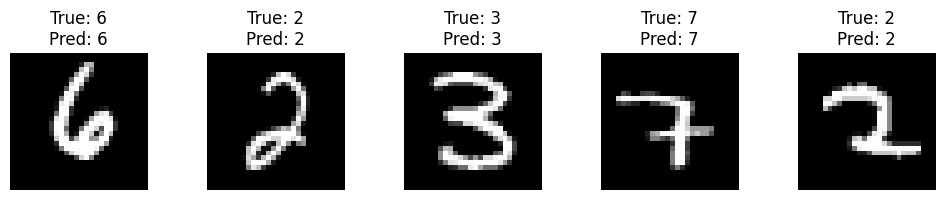

In [2]:
# Import TensorFlow. TensorFlow provides the deep learning framework and Keras API for building models.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility.
np.random.seed(42)
tf.random.set_seed(42)

# Load the MNIST dataset directly from TensorFlow's built-in datasets.
# x_train and x_test contain image pixel data, while y_train and y_test contain the corresponding digit labels.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values of the images from the original range of 0 to 255 to a range of 0 to 1.
# This scaling helps the neural network train faster and more reliably.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to include a channel dimension (needed for CNN input).
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build a Sequential CNN model, which is a linear stack of layers.
model = tf.keras.models.Sequential([
    # First convolutional layer with 32 filters and a 3x3 kernel.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # MaxPooling layer reduces spatial dimensions and helps extract dominant features.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with 64 filters.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Second MaxPooling layer.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten layer converts the 2D feature maps into a 1D array.
    tf.keras.layers.Flatten(),

    # Dense layer with 64 neurons and ReLU activation.
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer with 10 neurons (for digits 0–9) and softmax activation.
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model.
# - optimizer='adam': Adaptive learning rate optimizer.
# - loss='sparse_categorical_crossentropy': Suitable for integer-labeled classification.
# - metrics=['accuracy']: Track accuracy during training and testing.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data over 5 epochs.
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f} | Test Loss: {test_loss:.4f}")

## Ethic Considerations Fairness Check: Accuracy
import numpy as np
from sklearn.metrics import accuracy_score

# Predict labels
y_pred = np.argmax(model.predict(x_test), axis=1)

# Check accuracy per digit class
for digit in range(10):
    indices = np.where(y_test == digit)[0]
    acc = accuracy_score(y_test[indices], y_pred[indices])
    print(f"Digit {digit} Accuracy: {acc:.4f}")

# Select 5 random test samples.
sample_indices = np.random.choice(len(x_test), 5, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Predict the labels using the trained model.
predictions = np.argmax(model.predict(sample_images), axis=1)

# Plot the sample images with their true and predicted labels.
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPred: {predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()